In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [12]:
report = """
'NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal'
Optimized Thresholds: [0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9908256880733946, 0.9816513761467891, 0.9908256880733946, 0.9908256880733946, 0.9816513761467891]
Optimization Metric: 0.2346

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.5871, precision: 0.5871, recall: 1.0000, f1-score: 0.7398, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.4028, precision: 0.4027, recall: 1.0000, f1-score: 0.5742, support: 4351.0000
  Conflict:                              binary_accuracy: 0.1745, precision: 0.1740, recall: 1.0000, f1-score: 0.2964, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.2248, precision: 0.2244, recall: 1.0000, f1-score: 0.3665, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.2351, precision: 0.2338, recall: 1.0000, f1-score: 0.3790, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.0923, precision: 0.0892, recall: 0.9990, f1-score: 0.1639, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.0861, precision: 0.0813, recall: 1.0000, f1-score: 0.1504, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.0912, precision: 0.0906, recall: 1.0000, f1-score: 0.1661, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.0851, precision: 0.0840, recall: 0.9989, f1-score: 0.1550, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.0472, precision: 0.0422, recall: 1.0000, f1-score: 0.0810, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.0381, precision: 0.0376, recall: 1.0000, f1-score: 0.0725, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.0516, precision: 0.0364, recall: 0.9949, f1-score: 0.0702, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.0314, precision: 0.0272, recall: 1.0000, f1-score: 0.0530, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.0259, precision: 0.0083, recall: 0.9888, f1-score: 0.0164, support: 89.0000
  micro avg:                             binary_accuracy: 0.1552, precision: 0.1518, recall: 0.9998, f1-score: 0.2636, support: 22871.0000
  macro avg:                             binary_accuracy: 0.1552, precision: 0.1514, recall: 0.9987, f1-score: 0.2346, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.1552, precision: 0.3199, recall: 0.9998, f1-score: 0.4501, support: 22871.0000
  samples avg:                           binary_accuracy: 0.1552, precision: 0.1520, recall: 0.9963, f1-score: 0.2575, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfrozen[8, 9, 10, 11]_BCE'
Optimized Thresholds: [0.28440366972477066, 0.44036697247706424, 0.6880733944954129, 0.3577981651376147, 0.5, 0.47706422018348627, 0.48623853211009177, 0.3853211009174312, 0.41284403669724773, 0.5321100917431193, 0.3119266055045872, 0.3853211009174312, 0.3944954128440367, 0.06422018348623854]
Optimization Metric: 0.7312

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7810, precision: 0.7721, recall: 0.8895, f1-score: 0.8267, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9139, precision: 0.8901, recall: 0.8970, f1-score: 0.8935, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9526, precision: 0.8641, recall: 0.8632, f1-score: 0.8637, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.9001, precision: 0.7684, recall: 0.7941, f1-score: 0.7810, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9079, precision: 0.7726, recall: 0.8580, f1-score: 0.8131, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9550, precision: 0.7761, recall: 0.6954, f1-score: 0.7336, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9535, precision: 0.7209, recall: 0.6945, f1-score: 0.7075, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9450, precision: 0.7025, recall: 0.6810, f1-score: 0.6916, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9623, precision: 0.8257, recall: 0.6993, f1-score: 0.7573, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9755, precision: 0.6894, recall: 0.7577, f1-score: 0.7219, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9758, precision: 0.6799, recall: 0.6749, f1-score: 0.6774, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9762, precision: 0.6658, recall: 0.6812, f1-score: 0.6734, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9888, precision: 0.7774, recall: 0.8225, f1-score: 0.7993, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9798, precision: 0.2081, recall: 0.5169, f1-score: 0.2968, support: 89.0000
  micro avg:                             binary_accuracy: 0.9405, precision: 0.7876, recall: 0.8308, f1-score: 0.8086, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9405, precision: 0.7224, recall: 0.7518, f1-score: 0.7312, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9405, precision: 0.7919, recall: 0.8308, f1-score: 0.8093, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9405, precision: 0.8168, recall: 0.8606, f1-score: 0.8082, support: 22871.0000

'bert-base-uncased_BCE'
Optimized Thresholds: [0.47000000000000003, 0.36, 0.19, 0.17, 0.19, 0.09, 0.08, 0.1, 0.1, 0.07, 0.06, 0.02, 0.03, 0.0]
Optimization Metric: 0.3108

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.6480, precision: 0.6345, recall: 0.9447, f1-score: 0.7591, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.6435, precision: 0.5385, recall: 0.8023, f1-score: 0.6445, support: 4351.0000
  Conflict:                              binary_accuracy: 0.7290, precision: 0.3525, recall: 0.6674, f1-score: 0.4614, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.5826, precision: 0.3078, recall: 0.6896, f1-score: 0.4256, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.6715, precision: 0.3892, recall: 0.7149, f1-score: 0.5040, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.7633, precision: 0.1639, recall: 0.4044, f1-score: 0.2332, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.5707, precision: 0.1142, recall: 0.6373, f1-score: 0.1936, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.8400, precision: 0.2594, recall: 0.4141, f1-score: 0.3190, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.8777, precision: 0.3016, recall: 0.3458, f1-score: 0.3222, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.7994, precision: 0.0779, recall: 0.3480, f1-score: 0.1273, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.8779, precision: 0.1013, recall: 0.2857, f1-score: 0.1496, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.3035, precision: 0.0417, recall: 0.8355, f1-score: 0.0795, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9408, precision: 0.0974, recall: 0.1433, f1-score: 0.1160, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.0082, precision: 0.0082, recall: 1.0000, f1-score: 0.0163, support: 89.0000
  micro avg:                             binary_accuracy: 0.6612, precision: 0.2696, recall: 0.7261, f1-score: 0.3932, support: 22871.0000
  macro avg:                             binary_accuracy: 0.6612, precision: 0.2420, recall: 0.5881, f1-score: 0.3108, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.6612, precision: 0.4226, recall: 0.7261, f1-score: 0.5234, support: 22871.0000
  samples avg:                           binary_accuracy: 0.6612, precision: 0.2826, recall: 0.7492, f1-score: 0.3888, support: 22871.0000


'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
Optimized Thresholds: [0.28, 0.56, 0.84, 0.73, 0.73, 0.9500000000000001, 0.88, 0.9, 0.91, 0.91, 0.92, 0.96, 0.99, 0.99]
Optimization Metric: 0.7280

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7744, precision: 0.7710, recall: 0.8758, f1-score: 0.8200, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9106, precision: 0.8901, recall: 0.8876, f1-score: 0.8888, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9512, precision: 0.8492, recall: 0.8749, f1-score: 0.8619, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8986, precision: 0.7729, recall: 0.7755, f1-score: 0.7742, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9066, precision: 0.7691, recall: 0.8573, f1-score: 0.8108, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9496, precision: 0.6980, recall: 0.7640, f1-score: 0.7295, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9509, precision: 0.6842, recall: 0.7311, f1-score: 0.7069, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9432, precision: 0.6827, recall: 0.6953, f1-score: 0.6890, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9584, precision: 0.7647, recall: 0.7302, f1-score: 0.7470, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9733, precision: 0.6531, recall: 0.7797, f1-score: 0.7108, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9761, precision: 0.7000, recall: 0.6379, f1-score: 0.6675, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9747, precision: 0.6368, recall: 0.6941, f1-score: 0.6642, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9895, precision: 0.8125, recall: 0.7986, f1-score: 0.8055, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9868, precision: 0.2750, recall: 0.3708, f1-score: 0.3158, support: 89.0000
  micro avg:                             binary_accuracy: 0.9389, precision: 0.7801, recall: 0.8294, f1-score: 0.8040, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9389, precision: 0.7114, recall: 0.7481, f1-score: 0.7280, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9389, precision: 0.7824, recall: 0.8294, f1-score: 0.8044, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9389, precision: 0.8108, recall: 0.8580, f1-score: 0.8023, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
Optimized Thresholds: [0.28, 0.5700000000000001, 0.8, 0.65, 0.6900000000000001, 0.91, 0.91, 0.89, 0.9, 0.9500000000000001, 0.9500000000000001, 0.98, 0.98, 0.99]
Optimization Metric: 0.7127

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7671, precision: 0.7614, recall: 0.8788, f1-score: 0.8159, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9068, precision: 0.8897, recall: 0.8773, f1-score: 0.8835, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9463, precision: 0.8204, recall: 0.8850, f1-score: 0.8515, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8955, precision: 0.7504, recall: 0.8002, f1-score: 0.7745, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9025, precision: 0.7703, recall: 0.8295, f1-score: 0.7988, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9461, precision: 0.6759, recall: 0.7588, f1-score: 0.7150, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9499, precision: 0.6925, recall: 0.6854, f1-score: 0.6889, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9397, precision: 0.6490, recall: 0.7260, f1-score: 0.6853, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9577, precision: 0.7650, recall: 0.7170, f1-score: 0.7402, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9724, precision: 0.6388, recall: 0.7907, f1-score: 0.7067, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9718, precision: 0.6229, recall: 0.6305, f1-score: 0.6267, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9725, precision: 0.5991, recall: 0.7147, f1-score: 0.6518, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9865, precision: 0.7059, recall: 0.8601, f1-score: 0.7754, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9819, precision: 0.1977, recall: 0.3933, f1-score: 0.2632, support: 89.0000
  micro avg:                             binary_accuracy: 0.9355, precision: 0.7643, recall: 0.8288, f1-score: 0.7953, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9355, precision: 0.6814, recall: 0.7534, f1-score: 0.7127, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9355, precision: 0.7690, recall: 0.8288, f1-score: 0.7967, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9355, precision: 0.7999, recall: 0.8571, f1-score: 0.7958, support: 22871.0000

  Optimized Thresholds: [0.27, 0.66, 0.84, 0.71, 0.74, 0.88, 0.86, 0.85, 0.92, 0.91, 0.93, 0.93, 0.96, 0.92]
Optimization Metric: 0.7252

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7707, precision: 0.7721, recall: 0.8646, f1-score: 0.8157, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9052, precision: 0.8945, recall: 0.8669, f1-score: 0.8805, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9512, precision: 0.8418, recall: 0.8861, f1-score: 0.8634, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8958, precision: 0.7572, recall: 0.7879, f1-score: 0.7722, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9078, precision: 0.7864, recall: 0.8307, f1-score: 0.8079, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9504, precision: 0.7156, recall: 0.7349, f1-score: 0.7251, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9504, precision: 0.6680, recall: 0.7689, f1-score: 0.7149, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9422, precision: 0.6799, recall: 0.6840, f1-score: 0.6820, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9610, precision: 0.8048, recall: 0.7081, f1-score: 0.7534, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9730, precision: 0.6582, recall: 0.7423, f1-score: 0.6977, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9741, precision: 0.6575, recall: 0.6478, f1-score: 0.6526, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9746, precision: 0.6226, recall: 0.7506, f1-score: 0.6807, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9896, precision: 0.7987, recall: 0.8259, f1-score: 0.8121, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9805, precision: 0.2095, recall: 0.4944, f1-score: 0.2943, support: 89.0000
  micro avg:                             binary_accuracy: 0.9376, precision: 0.7781, recall: 0.8217, f1-score: 0.7993, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9376, precision: 0.7048, recall: 0.7567, f1-score: 0.7252, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9376, precision: 0.7834, recall: 0.8217, f1-score: 0.8010, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9376, precision: 0.8127, recall: 0.8510, f1-score: 0.7999, support: 22871.0000
"""

In [13]:
def parse_report_to_dict(report_str):
    # Splitting the report by lines
    lines = report_str.split('\n')

    # Dictionary to hold all the data
    data = {}

    # Regular expression to match the patterns
    model_pattern = r"\'(.+?)\'"
    metric_pattern = r"(\w+|\w+ \w+|\w+ - \w+|\w+ \/\ \w+ \/\ \w+ \w+|\w+ \/\ \w+):.*?binary_accuracy: ([0-9.]+), precision: ([0-9.]+), recall: ([0-9.]+), f1-score: ([0-9.]+), support: ([0-9.]+)"
    
    current_model = None

    for line in lines:
        # Check if the line contains model name
        model_match = re.search(model_pattern, line)
        if model_match:
            # Assign the new model
            current_model = model_match.group(1)
            data[current_model] = {}
        else:
            # Extract metrics
            metrics = re.search(metric_pattern, line)
            if metrics:
                label = metrics.group(1)
                binary_accuracy = float(metrics.group(2))
                precision = float(metrics.group(3))
                recall = float(metrics.group(4))
                f1_score = float(metrics.group(5))
                support = float(metrics.group(6))

                # Add the metric to the current model's data
                data[current_model][label] = {
                    'binary_accuracy': binary_accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1-score': f1_score,
                    'support': support
                }

    return data

In [14]:
def dict_to_dataframe(data):
    """
    Converts a nested dictionary (model -> metrics) to a pandas DataFrame.

    :param data: Nested dictionary containing model metrics.
    :return: A pandas DataFrame.
    """
    # Flatten the nested dictionary
    flattened_data = []
    for model, metrics in data.items():
        for metric, values in metrics.items():
            flat_dict = {'model': model, 'metric': metric}
            flat_dict.update(values)
            flattened_data.append(flat_dict)

    # Convert to DataFrame
    df = pd.DataFrame(flattened_data)
    return df

In [15]:
def plot_metrics(df, metrics):
    """
    Plots bar charts for the given metrics.

    Parameters:
    - df: A pandas DataFrame containing the data to plot.
    - metrics: A list of strings representing the metric names to plot.

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, metric in enumerate(metrics):
        # Plotting the bar chart without legends
        df[metric].plot(kind="bar", ax=axs[i], legend=False)
        
        # Set titles and labels
        axs[i].set_title(metric.replace('_', ' ').title())
        axs[i].set_xlabel('Model')
        axs[i].set_ylabel('Value')
        
        # Rotate the labels and adjust the font size for each subplot individually
        axs[i].tick_params(axis='x', rotation=90, labelsize=8)
        
        # If needed, set new labels with line breaks for each subplot individually
        new_labels = [label.replace("_", "\n") for label in df.index]
        axs[i].set_xticklabels(new_labels)

    # Extract the handles and labels for the legend from the last axes object
    handles, labels = axs[-1].get_legend_handles_labels()

    # Create a single legend for the entire figure with the handles and labels
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), title='Metric')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [16]:
parsed_data = parse_report_to_dict(report)

In [17]:
df = dict_to_dataframe(parsed_data)
df

,model,metric,binary_accuracy,precision,recall,f1-score,support
0,NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal,Discrepancy - Procedural,0.5871,0.5871,1.0000,0.7398,6343.0
1,NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal,Aircraft Equipment,0.4028,0.4027,1.0000,0.5742,4351.0
2,NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal,Conflict,0.1745,0.1740,1.0000,0.2964,1879.0
3,NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal,Event / Encounter,0.0912,0.0906,1.0000,0.1661,978.0
4,NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal,ATC Issue,0.2351,0.2338,1.0000,0.3790,2522.0
...,...,...,...,...,...,...,...
80,NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroz...,Anomaly Occurred,0.9819,0.1977,0.3933,0.2632,89.0
81,NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroz...,micro avg,0.9355,0.7643,0.8288,0.7953,22871.0
82,NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroz...,macro avg,0.9355,0.6814,0.7534,0.7127,22871.0
83,NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroz...,weighted avg,0.9355,0.7690,0.8288,0.7967,22871.0


In [18]:
avg_metrics_df = df[df['metric'].str.contains('avg')]
pivot_df = avg_metrics_df.pivot_table(index='model', columns='metric', values=['binary_accuracy', 'precision', 'recall', 'f1-score'])
pivot_df

binary_accuracy            \
metric                                                   macro avg micro avg   
model                                                                          
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...          0.9405    0.9405   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...          0.9355    0.9355   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                     0.1552    0.1552   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...          0.9389    0.9389   
bert-base-uncased_BCE                                       0.6612    0.6612   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.9405       0.9405   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.9355       0.9355   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                 0.1552       0.1552   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.9389       0.9389   
bert-base-uncased_BCE                                   0.6612       0.6612   

                                                    f1-score            \
metric                                             macro avg micro avg   
model                                                                    
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...    0.7312    0.8086   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...    0.7127    0.7953   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal               0.2346    0.2636   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...    0.7280    0.8040   
bert-base-uncased_BCE                                 0.3108    0.3932   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.8082       0.8093   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.7958       0.7967   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                 0.2575       0.4501   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.8023       0.8044   
bert-base-uncased_BCE                                   0.3888       0.5234   

                                                   precision            \
metric                                             macro avg micro avg   
model                                                                    
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...    0.7224    0.7876   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...    0.6814    0.7643   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal               0.1514    0.1518   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...    0.7114    0.7801   
bert-base-uncased_BCE                                 0.2420    0.2696   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.8168       0.7919   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...      0.7999       0.7690   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                 0.1520       0.3199   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.8108       0.7824   
bert-base-uncased_BCE                                   0.2826       0.4226   

                                                      recall            \
metric                                             macro avg micro avg   
model                                                                    
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...    0.7518    0.8308   
NASA-AIML_MIKA_SafeAeroBERT_A

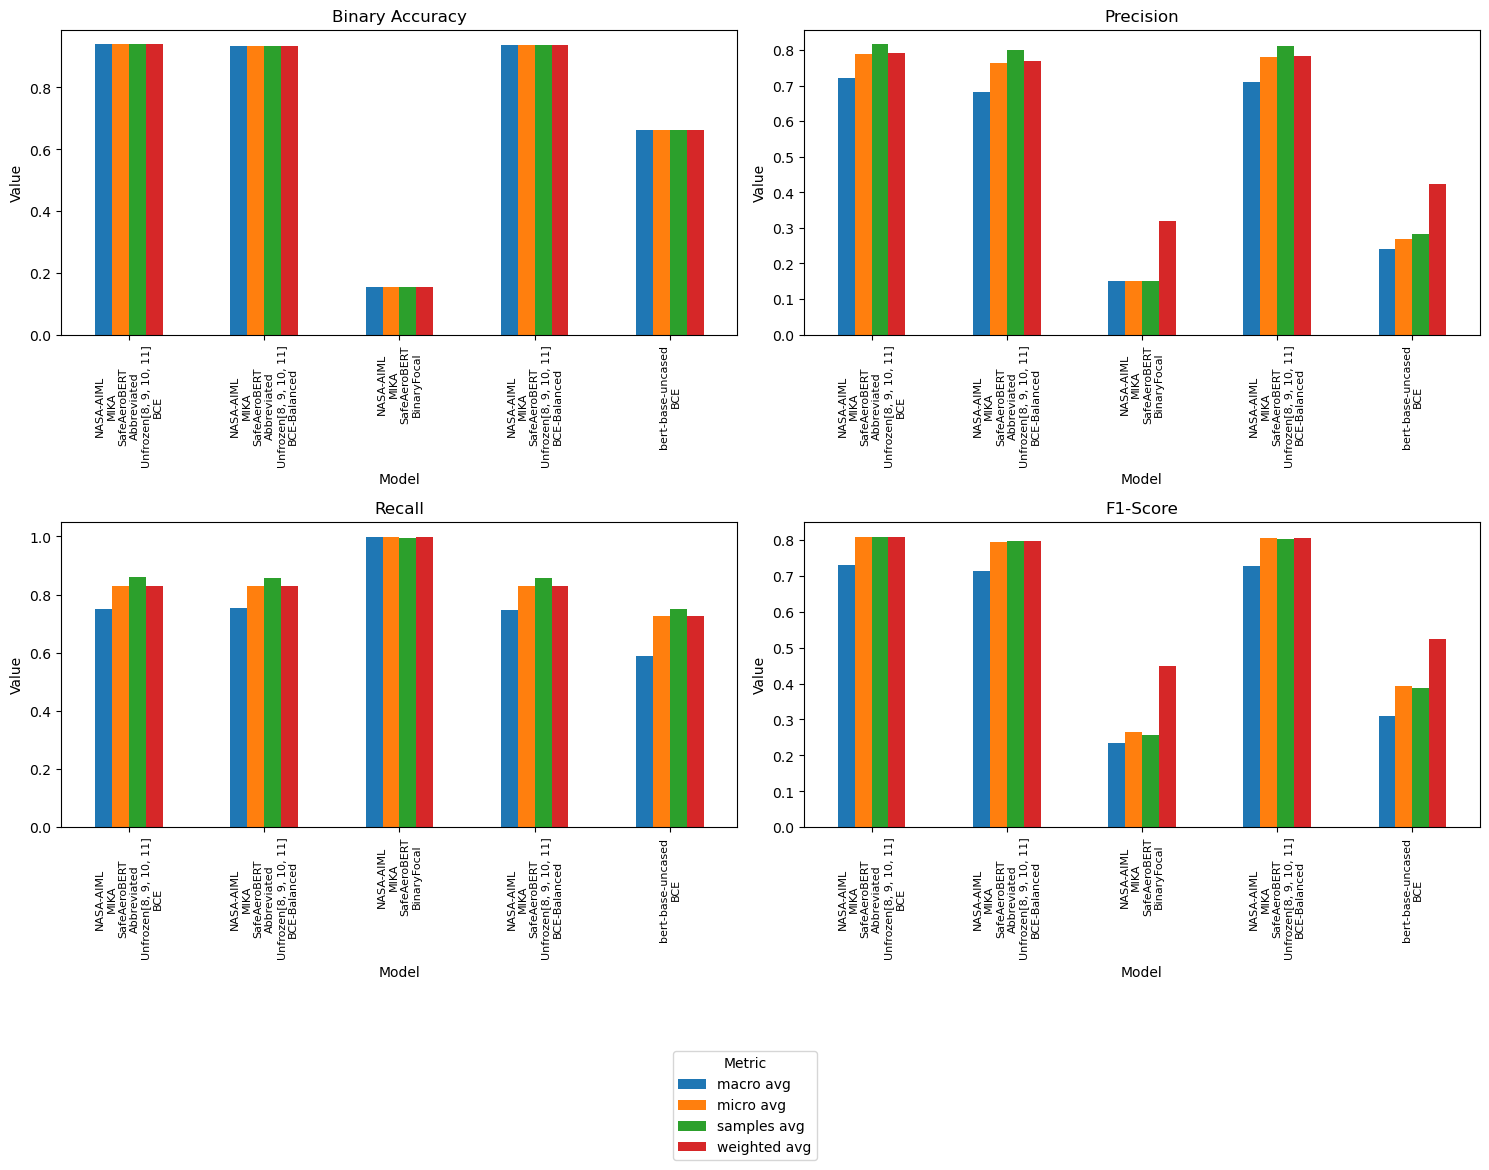

In [19]:
metrics_to_plot = ['binary_accuracy', 'precision', 'recall', 'f1-score']
plot_metrics(pivot_df, metrics_to_plot)

In [20]:
non_avg_metrics_df = df[~df['metric'].str.contains('avg')]
pivot__non_df = non_avg_metrics_df.pivot_table(index='model', columns='metric', values=['binary_accuracy', 'precision', 'recall', 'f1-score'])
pivot__non_df

binary_accuracy  \
metric                                                   ATC Issue   
model                                                                
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...          0.9079   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...          0.9025   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                     0.2351   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...          0.9066   
bert-base-uncased_BCE                                       0.6715   

                                                                       \
metric                                             Aircraft Equipment   
model                                                                   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...             0.9139   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...             0.9068   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                        0.4028   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...             0.9106   
bert-base-uncased_BCE                                          0.6435   

                                                                       \
metric                                             Airspace Violation   
model                                                                   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...             0.9758   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...             0.9718   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                        0.0381   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...             0.9761   
bert-base-uncased_BCE                                          0.8779   

                                                                              \
metric                                             Anomaly Occurred Conflict   
model                                                                          
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...           0.9798   0.9526   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...           0.9819   0.9463   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                      0.0259   0.1745   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...           0.9868   0.9512   
bert-base-uncased_BCE                                        0.0082   0.7290   

                                                                                  \
metric                                             Deck / Cabin / Aircraft Event   
model                                                                              
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...                        0.9623   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...                        0.9577   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                                   0.0851   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...                        0.9584   
bert-base-uncased_BCE                                                     0.8777   

                                                                         \
metric                                             Deviation - Altitude   
model                                                                     
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...               0.9550   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...               0.9461   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal                          0.0923   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...               0.9496   
bert-base-uncased_BCE                                            0.7633   

                                                                      \
metric                                             Deviation - Speed   
model                                                                  
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...            0.9762   
NASA-AIML_MIKA_SafeAeroBERT_Abbreviated_Unfroze...            0.9725   
NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal      

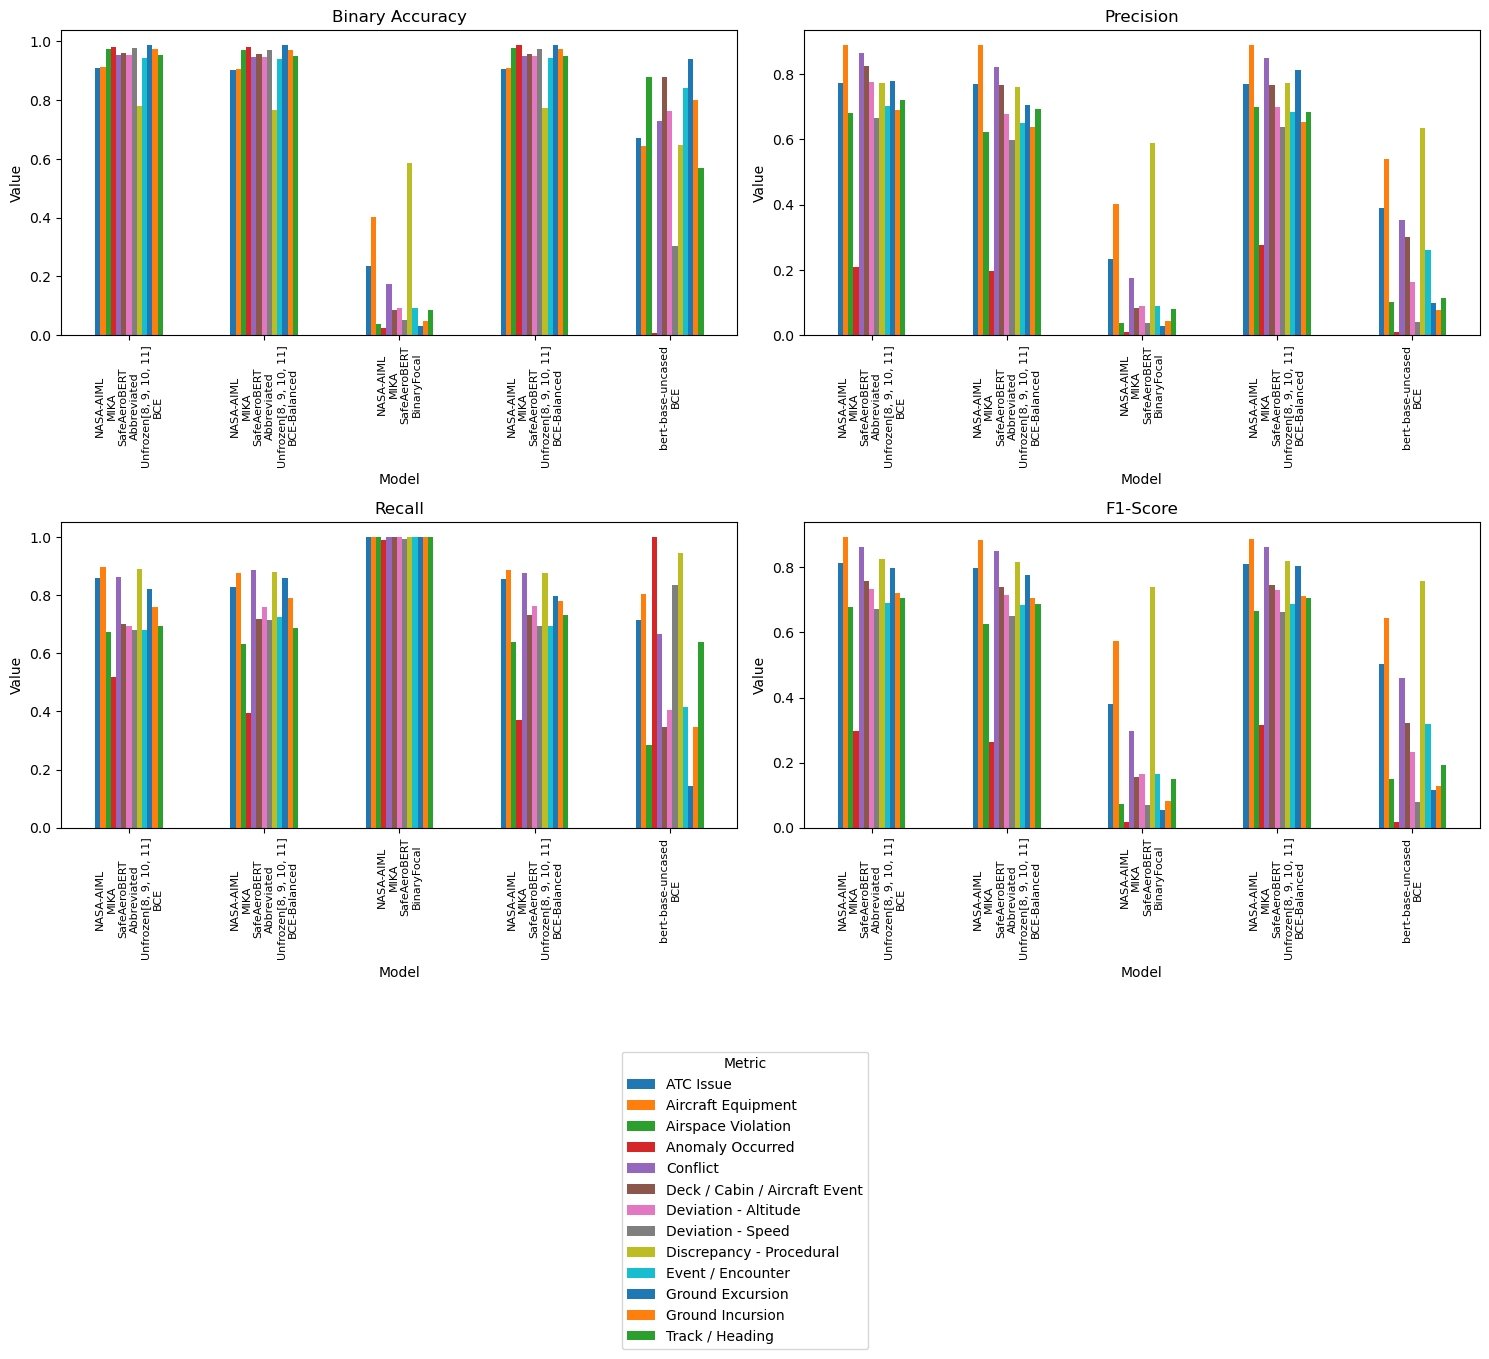

In [21]:
metrics_to_plot = ['binary_accuracy', 'precision', 'recall', 'f1-score']
plot_metrics(pivot__non_df, metrics_to_plot)